In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

C:\Users\codehax\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
print(type(mnist))
sample=mnist.train.images[7889].reshape(28,28)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>


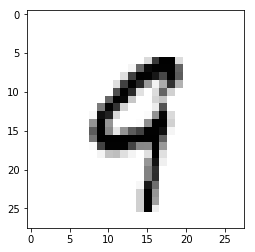

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sample)
plt.imshow(sample, cmap='Greys')

In [2]:
output_size=10
input_size=784
hidden_size=100

tf.reset_default_graph() #clears all default raw values

#layer 1 i.e, input
inputs=tf.placeholder(tf.float32, [None,input_size])
targets=tf.placeholder(tf.float32, [None,output_size])

#layer 2 i.e, hidden 1
weights_1=tf.get_variable("weight_1", [input_size,hidden_size])
biases_1=tf.get_variable("biases_1", [hidden_size])
output_1=tf.nn.relu(tf.matmul(inputs,weights_1) + biases_1)

#layer 3 i.e, hidden 2
weights_2=tf.get_variable("weight_2", [hidden_size,hidden_size])
biases_2=tf.get_variable("biases_2", [hidden_size])
output_2=tf.nn.relu(tf.matmul(output_1,weights_2) + biases_2)

#layer 4 i.e, output
weights_3=tf.get_variable("weight_3", [hidden_size,output_size])
biases_3=tf.get_variable("biases_3", [output_size])
outputs=tf.nn.relu(tf.matmul(output_2,weights_3) + biases_3)

#loss and optimization fn
loss=tf.nn.softmax_cross_entropy_with_logits(logits=outputs, labels=targets)
mean_loss=tf.reduce_mean(loss)
optimize=tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [3]:
#accuracy of model
out_equal_target=tf.equal(tf.argmax(outputs,1), tf.argmax(targets,1))
accuracy=tf.reduce_mean(tf.cast(out_equal_target, tf.float32))

In [4]:
#session and test
sess=tf.InteractiveSession()
init=tf.global_variables_initializer()
sess.run(init)
batch_size=100
batch_number=mnist.train._num_examples // batch_size 
max_epochs = 15
prev_validation_loss = 9999999.

'''
   Loads 100 inputs and 100 targets, batch size=100
   optimizes the algo and calculates the batch loss
   record the loss for the iteration
   start over the next 100 batch
   stop when the training set is exhausted
'''

for epoch_counter in range(max_epochs):
  curr_epoch_loss=0
  
  for batch_counter in range(batch_number):
    input_batch, target_batch =mnist.train.next_batch(batch_size)
    _, batch_loss=sess.run([optimize, mean_loss], feed_dict={inputs:input_batch, targets: target_batch})
    curr_epoch_loss += batch_loss
    
  curr_epoch_loss /= batch_number
  
  input_batch, target_batch = mnist.validation.next_batch(mnist.validation._num_examples)
  validation_loss, validation_accuracy=sess.run([mean_loss, accuracy], feed_dict={inputs:input_batch, targets: target_batch})
  print('Epoch '+str(epoch_counter+1)+
       '. Training Loss: '+'{0:.3f}'.format(curr_epoch_loss)+
       '. Validation Loss: '+'{0:.3f}'.format(validation_loss)+
       '. Validation Accuracy: '+'{0:.2f}'.format(validation_accuracy * 100.)+'%')
  
  if validation_loss > prev_validation_loss:
    break
  prev_validation_loss = validation_loss
print('End of Training')

Epoch 1. Training Loss: 0.752. Validation Loss: 0.598. Validation Accuracy: 76.84%
Epoch 2. Training Loss: 0.456. Validation Loss: 0.347. Validation Accuracy: 87.04%
Epoch 3. Training Loss: 0.328. Validation Loss: 0.343. Validation Accuracy: 87.18%
Epoch 4. Training Loss: 0.304. Validation Loss: 0.322. Validation Accuracy: 87.72%
Epoch 5. Training Loss: 0.288. Validation Loss: 0.315. Validation Accuracy: 87.66%
Epoch 6. Training Loss: 0.275. Validation Loss: 0.315. Validation Accuracy: 87.80%
Epoch 7. Training Loss: 0.268. Validation Loss: 0.316. Validation Accuracy: 87.88%
End of Training


In [5]:
input_batch, target_batch = mnist.test.next_batch(mnist.test._num_examples)
test_accuracy = sess.run([accuracy], feed_dict={inputs:input_batch, targets:target_batch})
test_accuracy_percent=test_accuracy[0]*100
print('Test Accuracy: '+'{0:.2f}'.format(test_accuracy_percent)+ '%')

Test Accuracy: 88.28%


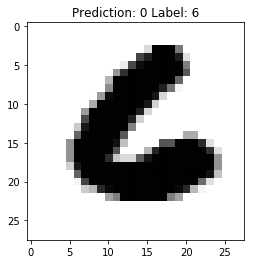

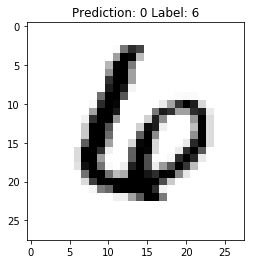

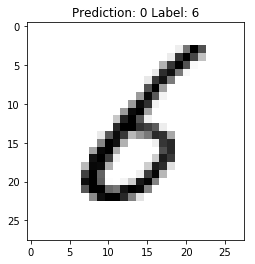

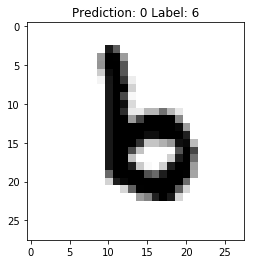

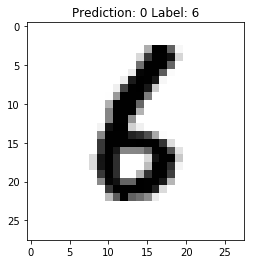

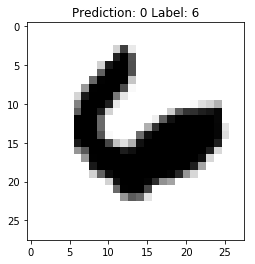

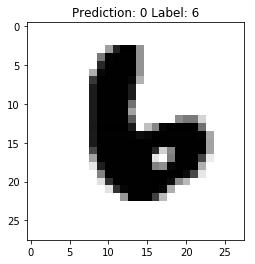

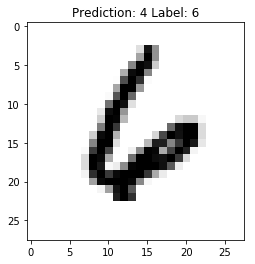

In [9]:
#misclassified datas
import matplotlib.pyplot as plt
%matplotlib inline
#Testing
for x in range(50):
    x_train=mnist.test.images[x,:].reshape(1,784)
    y_train=mnist.test.labels[x,:]
    label=y_train.argmax()
    prediction=sess.run(outputs, feed_dict={inputs: x_train}).argmax()
    if(prediction != label):
        plt.title('Prediction: %d Label: %d' % (prediction,label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()